# Problem setting

Though Jupyter was designed with reproducibility in mind, it is none the less a tool for data scientists, thus, it is not ideally suited for delivering insights to a non-technical audience, especially in the form of interactive dashboards.

Using [nbconvert](https://nbconvert.readthedocs.io/en/latest/) to generate HTML or PDF outputs, as well as utilizing [Rise](https://rise.readthedocs.io/en/stable/) for slideshow and PDF generation is very useful, but not scalable and interactive.

In short: Jupyter is not by default a dashboarding tool, __but__...

# Jupyter notebooks in "remote" environments

One of the main obstacles for non-technical audiences to consume Jupyter notebooks is the fact, that Python environments are not installed on their computers, so they can not "open" and "render" the notebooks. (Hence the need for eg. PDF conversion...)

None the less, notebooks became such a strong standard, that displaying them is a more and more widespread capability.

There are two possible ways / depth with which we would like to engage with a notebook: Only with the "results", thus, "view only", or also with a running kernel, thus "interactively".

## View only

[Nbviewer](https://nbviewer.jupyter.org/) is a very nice service, that "render" a notebook, if it is made available via an URL.

<img src="https://www.tutorialspoint.com/jupyter/images/nbviewer.jpg" width=50%>

Beside self-hosting, the most widespread approach is to use [Github](https://github.com/)repositories or "Gists" for hosting the file.

This is so common, that [Github](https://github.com/) itself integrated notebook rendering capabilities.
<img src="https://reproducible-science-curriculum.github.io/sharing-RR-Jupyter/fig/github-sharing-notebook-preview.png" width=75%>

## Running kernel

The previously discussed solutions were aiming at only rendering the notebooks as static "result files" and making them available via the web. But what if we would like to allow for any kind of interaction between the data / the model we built, and the users, we need a running kernel in the background.

This - very sadly - requires us to think about the possible infrastructure and it's constraints.

Luckily, there are some solutions we can use:

### Google Colab

Google's [Colaboratory](https://colab.research.google.com/) is providing free resources (even GPUs) for research purposes, and uses Google Drive for persistent storage.

For easy reproducibility, it is now customary to use Colab Github integration, or even a [Chrome extension](https://chrome.google.com/webstore/detail/open-in-colab/iogfkhleblhcpcekbiedikdehleodpjo?hl=nl) to directly open a notebook in a Colab environment.

<img src=https://miro.medium.com/max/2020/1*M8ctWU_dqFpLXsB1Zg7CRQ.png width=55%>

### [Binder](https://mybinder.org/) 

Another, more customizable solution is Binder.

<img src="https://miro.medium.com/max/2078/1*lWcoBaRvNzXxzGPqV_3vew.png" width=50%>

Binder is strongly integrated with Github, and aims to enable the creation of reproducible environments "on the go". With some added configuration files in your project, you can define the dependencies and environment in which you would like to see your notebook running, thus anyone who clicks on the "Launch Binder" button will be commissioned a new virtual machine, with the appropriate environment. (Binder is a free and open solution, but since the source is available, can be adopted to corporate environments.)

<img src="https://iiif.elifesciences.org/journal-cms/labs_experiment%2F2018-11%2Flaunch_binder.jpg/0,0,759,428/full/0/default.jpg" width=15%>

A nice tutorial on how to embed Binder based frames into a website can be found [here](https://elc.github.io/posts/embed-interactive-notebooks/). 

Though popular, all the above mentioned solutions are primarily aiming at users with some technical skills, thus, mainly focusing on reproducibility and learning. 

If we would like to deliver more professional dashboard experience, we have to resort to other solutions.

# Creating dashboards with Jupyter

### Addons

Even inside the strictly defined Jupyter ecosystem, there are  

#### Jupyter widgets

Jupyter has a wide range of widgets, that can make a notebook mo

In [1]:
import ipywidgets as widgets
from IPython.display import display

x = 5
slider = widgets.IntSlider(value=x, min=0, max=10)

def on_change(v):
    x = v['new']
    print(v['new'])
slider.observe(on_change, names='value')
display(slider)

IntSlider(value=5, max=10)

6
7


<IPython.core.display.Javascript object>


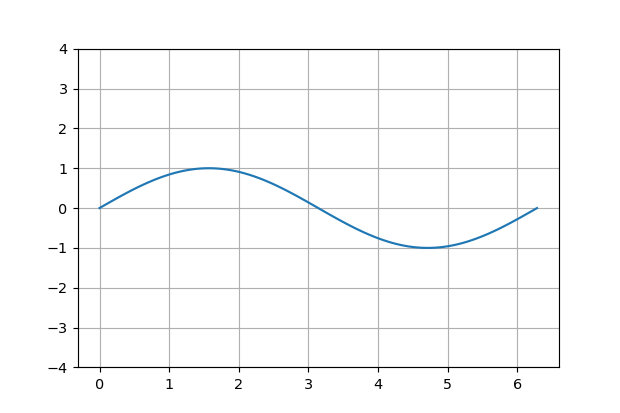

interactive(children=(IntSlider(value=1, description='w', max=10), FloatSlider(value=1.0, description='amp', m…

In [8]:

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim([-4, 4])
ax.grid(True)

# generate x values
x = np.linspace(0, 2 * np.pi, 100)

def my_sine(x, w, amp, phi):
    return amp*np.sin(w * (x-phi))

@widgets.interact(w=(0, 10, 1), amp=(0, 4, .1), phi=(0, 2*np.pi+0.01, 0.01))
def update(w = 1.0, amp=1, phi=0):
    if not ax.lines:
        ax.plot(x, my_sine(x, w, amp, phi), color='C0')
    else:
        ax.lines[0].set_ydata(my_sine(x, w, amp, phi))


If the cell above does not work, one can try `ipympl` with `conda install -c conda-forge ipympl` and lament on the fact, that maybe this is not the easiest solution to develop a dashboard app, after all...


#### [Jupyter dashboard layout](https://jupyter-dashboards-layout.readthedocs.io/en/latest/using.html) 

is an addon that enables the reshuffling, hiding and customization of notebook cells, so that they can form a decent dashboard, hiding the clutter.

Together with the interactive widgets, they can form the basis of pretty nice dashboards!

<img src="https://jupyter-dashboards-layout.readthedocs.io/en/latest/_images/preview.png" width=55%>

### More "complete" solutions

If we are not that keen on "puzzling" together the desired interactions from widgets, and strive for some more  "out of the box" solutions that can finish the last mile, turning our notebook into a standalone web dashboard, we can look at something like [Voilá](https://github.com/voila-dashboards/voila), that, according to it's own motto:

"turns Jupyter notebooks into standalone web applications".

<img src="https://miro.medium.com/max/3000/1*iBz5dUYHT5N9dbymPKTGCg.gif" width=75%>

Or [Nbinteract](https://www.nbinteract.com/), which serves a very similar purpose.

# Interactively exploring models

For the very specific use case, when someone would like to interact with machine learning (especially deep learning) models, would like to edit the inputs and visualize their outputs, [Gradio](https://www.gradio.app/docs#o_html) can come in handy.

It has built-in UI elements for the most widespread input and output types for ML models, allowing for easy interaction with models.

<img src="https://camo.githubusercontent.com/285c5ddc7937125c000ccafe4519d86784d9f0b5/68747470733a2f2f692e6962622e636f2f6d30736b44306a2f626572742e676966" width=75%>

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2126721%2Fd91905bb419cdb121d92bbd4788aba81%2Fmnist.gif?generation=1594766845379238&alt=media" qidth=75%>

# Independent data apps

If we would like to have a complete framework for rapidly developing web based UI-s, luckily, we also have several options. One noteworthy amongst them is [Streamlit](https://www.streamlit.io/), which is especially designed for the **rapid development of data applications**.

<video controls src="https://s3-us-west-2.amazonaws.com/assets.streamlit.io/videos/udacity_car_demo-2.mp4" width=75%>

The above long list of solutions is by no means complete or final, since the data ecosystem is one of the most vibrant fields in software, newer and newer solutions are born every day. Keep an eye out!